# Stochastic inverse problem

We first set up the problem $T\colon \ell^2\rightarrow \ell^2$ with $(f_n)\mapsto (f_n/n)$. The data is in the white noise model is given by $Y=(y_n)$ where $y_n\sim N((Tf^\dagger)_n,\varepsilon)$.

In [1]:
from numpy import array, zeros, mean, var,linspace,log,ones,transpose,exp
from numpy.linalg import norm, lstsq
from numpy.random import normal

def operator(f):
    mult=array(range(1,10000+1))
    return f/mult

fDagger=array(range(1,10000+1))**(-3/2)
gDagger=operator(fDagger)

def data(epsilon):
    return normal(gDagger,epsilon)

Now we use Tikhonov regularization with a a-prori paramter choice rule. Note that the setting of this exercise fits into the framework of the previous one with $p=2$ and $\nu=1$ (actually this is not quite correct, we only obtain that $f^\dagger\in \operatorname(ran)(T^*T)^{\nu/2}$ for all $\nu<1$ for the analysis we will still assume that it holds with $\nu=1$). Hence due to the results of that exercise we should pick $\alpha =\varepsilon^{\frac{ 2 p}{p(\nu+1)+1}}=\varepsilon^{\frac{4}{5}}$. It also implies that we expect to see the convergence rate $(\mathbf E [\| \widehat f_\alpha-f^\dagger\|^2])^{1/2}=\varepsilon^{\frac{\nu p}{p(\nu+1) +1}}=\varepsilon^{2/5}$. Note that by construction we expect $(\mathbf{Var} [\| \widehat f_\alpha-f^\dagger\|^2])^{1/2}=\varepsilon$

In [2]:
epsilonSet=(10)**(-linspace(1,10,10))
empMise=zeros(epsilonSet.shape)
empVar=zeros(epsilonSet.shape)
numExp=100

def tikhonov(data,alpha):
    mult=(1.*array(range(1,10000+1)))**(-1)
    return (mult*data)/(alpha+mult**2)

for iii,epsilon in enumerate(epsilonSet):
    alpha=epsilon**(4/5)
    mise=zeros(numExp)
    for jjj in range(numExp):
        fHat=tikhonov(data(epsilon),alpha)
        mise[jjj]=norm(fDagger-fHat)**2
    empMise[iii]=(mean(mise))**(1/2)
    empVar[iii]=var(mise)**(1/2)

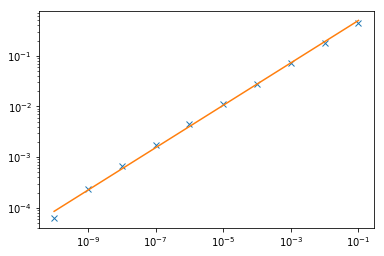

In [3]:
A=array([ones(epsilonSet.shape),log(epsilonSet)])
fitMise=lstsq(transpose(A),transpose(log(empMise)))
fitVar=lstsq(transpose(A),transpose(log(empVar)))

import matplotlib.pyplot as plt

plt.loglog(epsilonSet,empMise, 'x')
plt.loglog(epsilonSet, exp(fitMise[0][0])*epsilonSet**fitMise[0][1])
plt.show()

plt.loglog(epsilonSet,empVar, 'x')
plt.loglog(epsilonSet, exp(fitVar[0][0])*epsilonSet**fitVar[0][1])
plt.show()

In [4]:
rateMise=fitMise[0][1]
relErrorMise=abs(rateMise-0.4)/0.4

rateVar=fitVar[0][1]
relErrorVar=abs(rateVar-1)/1

print('We obtain a convergence rate with exponent \mu_E={:1.2e}, a relative error of {:1.2e}'.format(rateMise,relErrorMise))
print('We obtain a convergence rate with exponent \mu_Var={:1.2e}, a relative error of {:1.2e}'.format(rateVar,relErrorVar))

We obtain a convergence rate with exponent \mu_E=4.19e-01, a relative error of 4.63e-02
We obtain a convergence rate with exponent \mu_Var=1.01e+00, a relative error of 9.79e-03
